I was curious to know the most in demand data visualization and statistical tools in the world of data analysis, so i wrote a code
that webscraped data analysts job listings from indeed website using BeautifilSoup and requests packages, after which i performed
data cleaning and manipulation using pandas and numpy. Then I made visualizations using plotly


In [1]:
from bs4 import BeautifulSoup
import requests
import time
#import urllib
import re
#from urllib.request import urlopen
import lxml
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore', category= FutureWarning)
#import cchardet


I wrote a piece of code that scraped the job title, salary, Company and location over 1500 data analysts jobs posted on Indeed

In [449]:
url_links = []
sub_links = []
titles = []
salaries = []
links = []
desc = []
companies = []
location = []

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.5005.124 Safari/537.36 Edg/102.0.1245.41'}

# url is the job search link in the form 'https://www.indeed.com/jobs?q=data%20analyst&l=usa&start='


def indeed_job_scraper(url, no_of_pages):
    print('getting links.....')
    n = no_of_pages * 10
    search_pages = range(0, n, 10)
    for i in search_pages:
        page = url + str(i)
        url_links.append(page)
#  This iterates through job search pages and appends to the url_links list

    for j in url_links:
        conn = requests.get(j, headers=headers)
        soup = BeautifulSoup(conn.text, 'lxml')
        body = soup.html.body
#   Creates a BeautifulSoup instance

        job_pages = body.find_all(name='a', attrs={'class': 'jcs-JobTitle'})
        for k in job_pages:
            job_sub_links = k.get('href')
            sub_links.append(job_sub_links)
#    This extracts the links from all the Job listings and appends to the  sub_link list

    for y in sub_links:
        link = 'https://www.indeed.com' + y
        links.append(link)
#     Some links were not loading so i added https://www.indeed.com to every link

    print(len(links))
    print('scraping job listings....')

#    req = requests.session()
    for z in links:
        try:
            title_link = requests.get(z, headers=headers)
        except:
            print('connection refused by the server')
            time.sleep(20)
            print('scraping pages.......')
            continue
        soup = BeautifulSoup(title_link.text, 'lxml')
        try:
            title = soup.html.body.find('h1').text
        except AttributeError:
            title = 'Na'
#    Gets all job titles

#        c = soup.html.find('div', {'Class' : 'icl-u-lg-mr--sm icl-u-xs-mr--xs'})
        try:
            company = soup.html.body.find(
                'div', {'class': 'icl-u-textColor--success'}).text
        except AttributeError:
            company = 'Na'
#      Gets all company names

        try:
            locations = soup.html.body.find('div', attrs={
                                            'class': 'icl-u-xs-mt--xs icl-u-textColor--secondary jobsearch-JobInfoHeader-subtitle jobsearch-DesktopStickyContainer-subtitle'}).find_all('div', attrs={'class': ''})[3].text
        except (AttributeError, TypeError):
            locations = 'Na'
#       Gets all locations

        try:
            salary = soup.html.body.find('div', id='salaryInfoAndJobType').text
        except AttributeError:
            salary = 'Na'
            continue
#       Gets all salaries

        description = soup.html.body.find(
            'div', id='jobDescriptionText').text.replace('\n', '')
#        Gets all job descriptions

        titles.append(title)
        salaries.append(salary)
        desc.append(description)
        companies.append(company)
        location.append(locations)
        for n in range(20, 680, 20):
            if len(location) == n:
                print('appended ' + str(n) + ' job listings')

    print('Finished')


In [450]:
indeed_job_scraper(
    'https://www.indeed.com/jobs?q=data%20analyst%20%20%2445%2C000&fromage=1&start', 7)


getting links.....
105
scraping job listings....
appended 20 job listings
appended 40 job listings
appended 60 job listings
appended 80 job listings
Finished


Create a dictionary that stores the Job Title, Salary, Company Name, and Location and then convert it to a DataFrame.

In [451]:
job_list = {'titles': titles, 'salary': salaries,
            'company': companies, 'job_desc': desc, 'location': location}
df = pd.DataFrame.from_dict(job_list)
df.head(40)


,titles,salary,company,job_desc,location
0,Data Analyst,"$71,872 - $88,073 a year - Full-time",Public Health Institute,Data AnalystPosting Number: #1312Position Titl...,Remote
1,Data Analyst,"$80,000 - $95,000 a year - Full-time",Na,About Montaro: Montaro is a leading Amazon dig...,Remote
2,Customer Data Analyst,"$79,800 - $119,800 a year - Full-time",Renaissance,Company Description When you join Renaissanc...,Remote
3,Reporting/Data Analyst,Full-time,TMF Health Quality Institute,*This position is on the Analytics team ...,Remote
4,"Data Analyst, REMOTE!",Full-time,Elkay,"Data Analyst, REMOTE! Dare to design + build...","Oak Brook, IL 60523"
5,Junior Business Analyst,Full-time,NexInfo Solutions,"""Business Analysis"" Full Time ...",Remote
6,Senior Data Analyst,Full-time,Karna,"Overview: Karna, LLC is recruiting for a ...","Atlanta, GA"
7,Data Analyst,Full-time,Na,Position: Data Analyst Mid-LevelRequisition: 2...,
8,Business Intelligence / Data Analyst,Full-time,Southern New Hampshire University,We are one growing team with one powerful go...,Remote
9,Sr Platform Data Analyst,"$84,000 - $112,000 a year - Full-time",GHX,GHX is building an industry leading data platf...,Remote


Data Cleansing and Wrangling

In [786]:
df.shape


(1756, 5)

In [14]:
df.drop_duplicates(inplace=True)


Data Wrangling

Remove the strings in the salary column

In [ ]:
a = ['Full-time', 'Contract', 'Part-time', ',']
b = ['', '', '', '']
hourly = df[df['salary'].str.contains('hour')].replace(a, b, regex=True)
hourly[['salary_min', 'salary_max']
       ] = hourly.salary.str.split('-', 1, expand=True)
hourly['salary_min'] = hourly['salary_min'].str.replace('an hour', '')
hourly['salary_min'] = hourly['salary_min'].str.replace('$', '')
hourly['salary_min'] = hourly['salary_min'].str.replace('Up to', '')
hourly['salary_min'] = hourly['salary_min'].str.replace('From', '')

hourly['salary_max'] = hourly['salary_max'].str.replace('an hour', '')
hourly['salary_max'] = hourly['salary_max'].str.replace('$', '')
hourly['salary_max'] = hourly['salary_max'].str.replace('-', '')
hourly['salary_max'] = hourly['salary_max'].str.replace('Temporary', '')
hourly['salary_max'] = hourly['salary_max'].str.replace(
    'None', '0', regex=True)

yearly = df[df['salary'].str.contains('year')].replace(a, b, regex=True)
yearly[['salary_min', 'salary_max']
       ] = yearly.salary.str.split('-', 1, expand=True)
yearly['salary_min'] = yearly['salary_min'].str.replace('a year', '')
yearly['salary_min'] = yearly['salary_min'].str.replace('$', '')
yearly['salary_max'] = yearly['salary_max'].str.replace('a year', '')
yearly['salary_max'] = yearly['salary_max'].str.replace('$', '')
yearly['salary_max'] = yearly['salary_max'].str.replace('-', '')
yearly['salary_min'] = yearly['salary_min'].str.replace('Up to', '')
yearly['salary_min'] = yearly['salary_min'].str.replace('From', '')
yearly['salary_max'] = yearly['salary_max'].str.replace('Temporary', '')
yearly['salary_max'] = yearly['salary_max'].str.replace('Seasonal', '')

monthly = df[df['salary'].str.contains('month')].replace(a, b, regex=True)
monthly[['salary_min', 'salary_max']
        ] = monthly.salary.str.split('-', 1, expand=True)
monthly['salary_min'] = monthly['salary_min'].str.replace('a month', '')
monthly['salary_min'] = monthly['salary_min'].str.replace('$', '')
monthly['salary_max'] = monthly['salary_max'].str.replace('a month', '')
monthly['salary_max'] = monthly['salary_max'].str.replace('$', '')
monthly['salary_max'] = monthly['salary_max'].str.replace('-', '')
monthly['salary_min'] = monthly['salary_min'].str.replace('Up to', '')
monthly['salary_min'] = monthly['salary_min'].str.replace('From', '')
monthly['salary_max'] = monthly['salary_max'].str.replace('Temporary', '')
monthly['salary_max'] = monthly['salary_max'].str.replace('Seasonal', '')

weekly = df[df['salary'].str.contains('week')].replace(a, b, regex=True)
weekly[['salary_min', 'salary_max']
       ] = weekly.salary.str.split('-', 1, expand=True)
weekly['salary_min'] = weekly['salary_min'].str.replace('a week', '')
weekly['salary_min'] = weekly['salary_min'].str.replace('$', '')
weekly['salary_max'] = weekly['salary_max'].str.replace('a week', '')
weekly['salary_max'] = weekly['salary_max'].str.replace('$', '')
weekly['salary_max'] = weekly['salary_max'].str.replace('-', '')
weekly['salary_min'] = weekly['salary_min'].str.replace('Up to', '')
weekly['salary_min'] = weekly['salary_min'].str.replace('From', '')
weekly['salary_max'] = weekly['salary_max'].str.replace('Temporary', '')
weekly['salary_max'] = weekly['salary_max'].str.replace('Seasonal', '')

hourly['salary_max'].fillna(np.nan, inplace=True)
yearly['salary_max'].fillna(np.nan, inplace=True)
monthly['salary_max'].fillna(np.nan, inplace=True)
weekly['salary_max'].fillna(np.nan, inplace=True)

hourly['salary_max'] = hourly['salary_max'].replace(
    r'^\s*$', np.nan, regex=True)
yearly['salary_max'] = yearly['salary_max'].replace(
    r'^\s*$', np.nan, regex=True)
monthly['salary_max'] = monthly['salary_max'].replace(
    r'^\s*$', np.nan, regex=True)
weekly['salary_max'] = weekly['salary_max'].replace(
    r'^\s*$', np.nan, regex=True)

hourly['salary_max'] = hourly['salary_max'].astype(float)
hourly['salary_min'] = hourly['salary_min'].astype(float)
yearly['salary_max'] = yearly['salary_max'].astype(float)
yearly['salary_min'] = yearly['salary_min'].astype(float)
monthly['salary_max'] = monthly['salary_max'].astype(float)
monthly['salary_min'] = monthly['salary_min'].astype(float)
weekly['salary_max'] = weekly['salary_max'].astype(float)
weekly['salary_min'] = weekly['salary_min'].astype(float)

hourly['salary_max'].fillna(hourly['salary_min'], inplace=True)
yearly['salary_max'].fillna(yearly['salary_min'], inplace=True)
monthly['salary_max'].fillna(monthly['salary_min'], inplace=True)
weekly['salary_max'].fillna(weekly['salary_min'], inplace=True)


Convert all Salary formats to Yearly

In [16]:
hourly['salary'] = (hourly['salary_min'] + hourly['salary_max'])/2
yearly['salary'] = (yearly['salary_min'] + yearly['salary_max'])/2
monthly['salary'] = (monthly['salary_min'] + monthly['salary_max'])/2
weekly['salary'] = (weekly['salary_min'] + weekly['salary_max'])/2

hourly['salary_min'] = hourly['salary_min']*2000
hourly['salary_max'] = hourly['salary_max']*2000

monthly['salary_min'] = monthly['salary_min']*12
monthly['salary_max'] = monthly['salary_max']*12

weekly['salary_min'] = weekly['salary_min']*50
weekly['salary_max'] = weekly['salary_max']*50


In [17]:
hourly.drop(['salary'], axis=1, inplace=True)
yearly.drop(['salary'], axis=1, inplace=True)
monthly.drop(['salary'], axis=1, inplace=True)
weekly.drop(['salary'], axis=1, inplace=True)

Drop the rows that contain strings in the salary column and Concatenate with the dataframes with cleaned salary column

In [18]:
df_drop = df[df['salary'].str.contains('year')].index

df_drop1 = df[df['salary'].str.contains('hour')].index

df_drop2 = df[df['salary'].str.contains('month')].index

df_drop3 = df[df['salary'].str.contains('week')].index

df.drop(df_drop, axis=0, inplace=True)

df.drop(df_drop1, axis=0, inplace=True)

df.drop(df_drop2, axis=0, inplace=True)

df.drop(df_drop3, axis=0, inplace=True)


In [20]:
df.drop(['salary'], axis=1, inplace=True)
df = pd.concat([df, yearly, hourly, weekly, monthly], axis=0)

In [21]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,titles,company,job_desc,location,salary_min,salary_max
0,Entry Level Data Center Analyst,Align,"Why Align For over three decades, many of the ...","New York, NY 10004",NaN,NaN
1,Statistical Data Analyst,University of South Florida,Dept Number/Name: 0-6414-000 / College of Publ...,Tampa FL 33620,50000.0,61050.0
2,Data/Requirements Analyst,Empower AI Inc.,Overview: Empower AI is AI for government...,Remote,NaN,NaN
3,BI Analyst I or BI Analyst II,"City of Plano, Texas",We are looking for a passionate and skilled BI...,"Plano, TX",NaN,NaN
4,Senior Data Analyst - Supply,StubHub,Senior Data Analyst – Supply StubHub is lookin...,"New York, NY 10018",NaN,NaN


In [22]:
df.shape


(1756, 6)

In [ ]:
df.to_csv('clean_indeed_data_analysts_job_listings.csv', index=False)

some rows contain 'Remote' as the location, so create a new dataframe df_remote containing such rows and then drop the rows from the main dataframe
 from the df_remote dataframe, get the locations by creating a list of US States and their abbreviations and then search for the list items in their respective rows from the job_desc column.

In [23]:
df_remote = df[df['location'].str.contains('Remote', na=False)]
df_remote_drop = df[df['location'].str.contains('Remote', na=False)].index
df.drop(df_remote_drop, axis=0, inplace=True)


create a list of US states and create a new dataframe column by searching the for the list items in the dataframe location column

In [ ]:
re_states = "Alabama|Alaska|Arizona|Arkansas|California|Colorado|Connecticut|Delaware|Florida|Georgia|Hawaii|Idaho|Illinois|Indiana|Iowa|Kansas|Kentucky|Louisiana|Maine|Maryland|Massachusetts|Michigan|Minnesota|Mississippi|Missouri|Montana|Nebraska|Nevada|New Hampshire|New Jersey|New Mexico|New York|North Carolina|North Dakota|Ohio|Oklahoma|Oregon|Pennsylvania|Rhode Island|South Carolina|South Dakota|Tennessee|Texas|Utah|Vermont|Virginia|Washington|West Virginia|Wisconsin|Wyoming|AL | AK | AZ | AR | CA | CO | CT | DC | DE | FL | GA | HI | ID | IL | IN | IA | KS | KY | LA | ME | MD | MA | MI | MN | MS | MO | MT | NE | NV | NH | NJ | NM | NY | NC | ND | OH | OK | OR | PA | RI | SC | SD | TN | TX | UT | VT | VA | WA | WV | WI | WY |AL|AK|AZ|AR|CA|CO|CT|DC|DE|FL|GA|HI|ID|IL|IN|IA|KS|KY|LA|ME|MD|MA|MI|MN|MS|MO|MT|NE|NV|NH|NJ|NM|NY|NC|ND|OH|OK|OR|PA|RI|SC|SD|TN|TX|UT|VT|VA|WA|WV|WI|WY "
re_states_abv_ = "AL|AK|AZ|AR|CA|CO|CT|DC|DE|FL|GA|HI|ID|IL|IN|IA|KS|KY|LA|ME|MD|MA|MI|MN|MS|MO|MT|NE|NV|NH|NJ|NM|NY|NC|ND|OH|OK|OR|PA|RI|SC|SD|TN|TX|UT|VT|VA|WA|WV|WI|WY"

df_remote['state'] = df_remote['job_desc'].str.findall(re_states)
df_remote['state'] = df_remote['state'].str[0]


In [25]:
states_names = ["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado",
                "Connecticut", "District of Columbia", "Delaware", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois",
                "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland",
                "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana",
                "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York",
                "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania",
                "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah",
                "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"]

states_abv = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA",
              "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD",
              "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ",
              "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC",
              "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]


In [ ]:
#df_remote.drop(['location_2'], axis=1, inplace=True)
df_remote['state'] = df_remote['state'].replace(
    states_abv, states_names, regex=True)


Extract the Cities and States from the Location by using the split function

In [27]:
df[['city', 'state']] = df['location'].str.split(',', 1, expand=True)

In [28]:
df.drop(['state'], axis=1, inplace=True)

In [29]:
df['state'] = df['location'].str.findall(re_states)
df['state'] = df['state'].str[0]

In [30]:
df['state'] = df['state'].replace(states_abv, states_names, regex=True)

In [31]:
num = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '0']
df['city'] = df['city'].replace(states_abv, '', regex=True)
df['city'] = df['city'].replace(num, '', regex=True)
df.head()

,titles,company,job_desc,location,salary_min,salary_max,city,state
0,Entry Level Data Center Analyst,Align,"Why Align For over three decades, many of the ...","New York, NY 10004",NaN,NaN,New York,New York
1,Statistical Data Analyst,University of South Florida,Dept Number/Name: 0-6414-000 / College of Publ...,Tampa FL 33620,50000.0,61050.0,Tampa,Florida
3,BI Analyst I or BI Analyst II,"City of Plano, Texas",We are looking for a passionate and skilled BI...,"Plano, TX",NaN,NaN,Plano,Texas
4,Senior Data Analyst - Supply,StubHub,Senior Data Analyst – Supply StubHub is lookin...,"New York, NY 10018",NaN,NaN,New York,New York
5,Data Protection Analyst,Proofpoint,It's fun to work in a company where people...,"Saipan, MP",NaN,NaN,Saipan,NaN


In [32]:
df = pd.concat([df, df_remote], axis=0)
df.shape

(1756, 8)

In [33]:
df.drop_duplicates(inplace=True)

In [34]:
df['state'] = df['state'].str.strip()
df['city'] = df['city'].str.strip()

In [194]:
#df.to_csv('clean_indeed_data_analysts_job_listings.csv', index=False)
#df.to_excel('clean_indeed_data_analysts_job_listings.xlsx', index=False)

In [2]:
df = pd.read_csv('clean_indeed_data_analysts_job_listings.csv')

Exploratory Data Analysis

In [3]:
fig = px.box(df, x=['salary_min', 'salary_max'],
                   width=600, height=400)
fig.show()

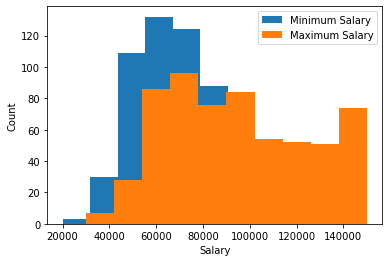

In [4]:
plt.hist(data=df, x='salary_min', label= 'Minimum Salary')
plt.hist(data=df, x='salary_max', label= 'Maximum Salary')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.legend()
plt.show()

In [5]:
df.describe()


,salary_min,salary_max
count,608.000000,608.000000
mean,72416.986842,94996.296053
std,21438.596849,30316.291124
min,20000.000000,30000.000000
25%,56618.000000,70300.000000
50%,69915.000000,90000.000000
75%,85000.000000,118754.000000
max,137500.000000,150000.000000


Create New DataFrame that has no NaN salary values for the Visualizations

In [6]:
df2 = df.dropna(subset=['salary_min', 'salary_max'], axis=0)
df2.head()


,titles,company,job_desc,location,salary_min,salary_max,city,state
1,Statistical Data Analyst,University of South Florida,Dept Number/Name: 0-6414-000 / College of Publ...,Tampa FL 33620,50000.0,61050.0,Tampa,Florida
5,Applied Data Science Analyst (Remote Friendly),Clark Associates,Location: Remote Job Summary: WebstaurantStore...,Lititz PA 17543,60000.0,110000.0,Lititz,Pennsylvania
8,Business Analyst,Cyber Tech Group,Department: Project Management P...,NaN,65000.0,65000.0,NaN,NaN
16,GIS Analyst Sr,Jefferson County Colorado,CURRENT Jefferson County employees Do NOT appl...,Golden CO,76527.0,118617.0,Golden,Colorado
18,Data Analyst with ServiceNow,Hopewell Health,Job Type: Job Category: ITJob DescriptionRole ...,Malvern PA,80000.0,80000.0,Malvern,Pennsylvania


In [7]:
df2 = df2.groupby(['city']).size().to_frame(name='counts')
df2 = df2.reset_index()
df2 = df2.sort_values(['counts'], ascending=False)

df2 = df2[df2['counts'] >= 7]
df2


,city,counts
11,Austin,26
127,New York,18
53,Denver,18
13,Baltimore,13
211,Washington,13
50,Dallas,11
113,Los Angeles,10
185,Seattle,10
83,Hartford,8
10,Atlanta,8


In [8]:
df3 = df.groupby('city').mean('salary_min').reset_index()
df3 = df3.sort_values(['salary_min'], ascending=False)
df_top_cities = pd.merge(df2, df3, how='left')
df_top_cities = df_top_cities.sort_values(['salary_min'], ascending=False)
df_top_cities = df_top_cities.head(10)


In [9]:
df5 = df.dropna(subset=['salary_min', 'salary_max'], axis=0)
df5.head()

,titles,company,job_desc,location,salary_min,salary_max,city,state
1,Statistical Data Analyst,University of South Florida,Dept Number/Name: 0-6414-000 / College of Publ...,Tampa FL 33620,50000.0,61050.0,Tampa,Florida
5,Applied Data Science Analyst (Remote Friendly),Clark Associates,Location: Remote Job Summary: WebstaurantStore...,Lititz PA 17543,60000.0,110000.0,Lititz,Pennsylvania
8,Business Analyst,Cyber Tech Group,Department: Project Management P...,NaN,65000.0,65000.0,NaN,NaN
16,GIS Analyst Sr,Jefferson County Colorado,CURRENT Jefferson County employees Do NOT appl...,Golden CO,76527.0,118617.0,Golden,Colorado
18,Data Analyst with ServiceNow,Hopewell Health,Job Type: Job Category: ITJob DescriptionRole ...,Malvern PA,80000.0,80000.0,Malvern,Pennsylvania


In [10]:
df5 = df5.groupby(['state']).size().to_frame(name='counts')
df5 = df5.reset_index()
df5 = df5.sort_values(['counts'], ascending=False)

df5 = df5[df5['counts'] >= 11]
df5

,state,counts
2,California,64
39,Texas,54
3,Colorado,54
28,New York,36
42,Virginia,32
43,Washington,30
18,Maryland,24
21,Minnesota,16
7,Florida,16
1,Arizona,13


In [11]:
df6 = df.groupby('state').mean('salary_min').reset_index()
df6 = df6.sort_values(['salary_min'], ascending=False)
df_top_states = pd.merge(df5, df6, how='left')
df_top_states = df_top_states.sort_values(['salary_min'], ascending=False)
df_top_states = df_top_states.head(10)


Which Cities and have the Highest Average Minimum Salaries according to Jobs posted on Indeed


In [12]:
fig = px.bar(df_top_cities, x='city', y='salary_min',
             title='Indeed Data Analysts Average salaries by the Cities in USA',
             width=600, height=400,
             template='seaborn')
fig.update_xaxes(categoryorder='total descending')
fig.show()


In [13]:
fig = px.bar(df_top_states, x='state', y='salary_min',
             title='Indeed Data Analysts Average salaries by the States in USA',
             width=600, height=400,
             template='seaborn')
fig.update_xaxes(categoryorder='total descending')
fig.show()


What are the most Used Data Visualization Tools in USA

Search for matching values of BI tools in the Job description field

In [14]:
tableau = len(df[df['job_desc'].str.contains('Tableau', case=False)])
powerBI = len(df[df['job_desc'].str.contains('PowerBI|Power BI', case=False)])
qlik = len(df[df['job_desc'].str.contains('Qlik', case=False)])
domo = len(df[df['job_desc'].str.contains('Domo', case=False)])
looker = len(df[df['job_desc'].str.contains('Looker', case=False)])
ibm_cognos = len(df[df['job_desc'].str.contains('Cognos', case=False)])
sisense = len(df[df['job_desc'].str.contains('Sisense', case=False)])
google_data_studio = len(df[df['job_desc'].str.contains(
    'Google Data Studio|Google DataStudio', case=False)])


In [15]:
bi_tools = {'BI Tools': ['Tableau', 'Power BI', 'Qlik', 'Domo', 'Looker', 'IBM Cognos', 'Sisense', 'Google Data Studio'],
            'Count': [tableau, powerBI, qlik, domo, looker, ibm_cognos, sisense, google_data_studio]}
bi_tools = pd.DataFrame(bi_tools)


In [23]:
fig = px.bar(bi_tools, x='BI Tools', y='Count',
             width=600, height=400,
             title='Most in demand Visualization Tools',
             template= 'ggplot2',
             color_discrete_map= {'BI Tools': 'MediumPurple'})
fig.update_xaxes(categoryorder='total descending')
fig.show()


What are the most used Statistical Tools

In [17]:
python = len(df[df['job_desc'].str.contains('Python', case=False)])
r = len(df[df['job_desc'].str.contains(' R ', case=False)])
sas = len(df[df['job_desc'].str.contains(' SAS ', case=False)])
spss = len(df[df['job_desc'].str.contains('SPSS', case=False)])
minitab = len(df[df['job_desc'].str.contains('Mimitab', case=False)])
stata = len(df[df['job_desc'].str.contains('Stata', case=False)])
matlab = len(df[df['job_desc'].str.contains('Matlab', case=False)])
salesforce = len(df[df['job_desc'].str.contains('Salesforce', case=False)])
knime = len(df[df['job_desc'].str.contains('Knime', case=False)])



In [18]:
stat_tools = {'Statistical Tools': ['Python', 'R', 'SAS', 'Spss', 'Stata', 'Matlab', 'Salesforce', 'Knime'],
              'Count': [python, r, sas, spss, stata, matlab, salesforce, knime]}
stat_tools = pd.DataFrame(stat_tools)
stat_tools


,Statistical Tools,Count
0,Python,478
1,R,184
2,SAS,120
3,Spss,96
4,Stata,56
5,Matlab,28
6,Salesforce,71
7,Knime,3


In [19]:
fig = px.bar(stat_tools, x='Statistical Tools', y='Count',
             width=600, height=400,
             title='Most in demand Statistical Tools',
             template= 'ggplot2')
fig.update_xaxes(categoryorder='total descending')
fig.show()


In [20]:
sql = len(df[df['job_desc'].str.contains('SQL', case=False)])
sql
excel = len(df[df['job_desc'].str.contains(
    'excel |Spreadsheet|sheet|Power Query', case=False)])

In [21]:
tools = {'Tools': ['Python', 'R', 'SAS', 'Spss', 'Stata', 'Matlab', 'Salesforce', 'Knime', 'Excel', 'Tableau', 'Power BI', 'Qlik', 'Domo', 'Looker', 'IBM Cognos', 'Sisense', 'Google Data Studio', 'SQL'],
         'Count': [python, r, sas, spss, stata, matlab, salesforce, knime, excel, tableau, powerBI, qlik, domo, looker, ibm_cognos, sisense, google_data_studio, sql]}
tools = pd.DataFrame(tools)


What are generally the most used tools in Data Analysis 

In [22]:
fig = px.bar(tools, x='Tools', y='Count',
             width=600, height=400,
             title='Most in demand Tools')
fig.update_xaxes(categoryorder='total descending')
fig.show()
